<a href="https://colab.research.google.com/github/ighoshsubho/RefractiveIndex_Predictions/blob/main/RefractiveIndex_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv("/content/sample_data/train_set_refractive_index.csv")

In [5]:
data.head()

,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,Biehlite,2,0.0,0,0.000,0,0.000,0.000,0,0,...,0,0,0,0,0,0,6,340.619790,0.033629,8.407
1,Periclase,0,6.0,2,3.607,2,1.740,0.000,0,0,...,0,0,0,0,0,0,3,96.151400,0.011217,7.115
2,Tschermigite,0,1.5,2,1.645,2,1.458,0.000,6,0,...,0,0,0,0,0,0,15,175.098319,0.145659,0.998
3,Vanadinite,5,3.5,1,6.950,3,2.383,0.202,0,0,...,0,0,0,0,0,0,7,548.792400,0.044663,10.199
4,Calderite,6,7.0,2,3.756,2,1.872,0.000,0,0,...,0,0,0,0,0,0,4,154.869950,0.011223,11.454


# **Method Used**
Since this is an unsupervised dataset we are using **KMeans** that tries to cluster data based on their similarity. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. 

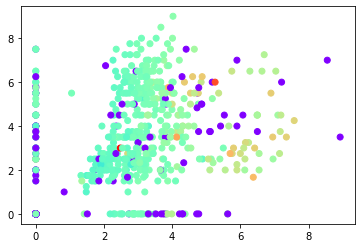

In [8]:
plt.scatter(data["Specific Gravity"], data["Mohs Hardness"], c=data["Refractive Index"], cmap='rainbow')

In [9]:
from sklearn.cluster import KMeans

In [92]:
kmeans = KMeans(n_clusters=28)

In [93]:
data_without_name = data.drop("Name",axis=1)

In [94]:
kmeans.fit(data_without_name)

KMeans(n_clusters=28)

In [95]:
kmeans.cluster_centers_

array([[2.58333333e+00, 3.51861111e+00, 1.75000000e+00, ...,
        5.08060422e+02, 1.00573148e-01, 5.64344444e+00],
       [2.80000000e+00, 2.75000000e+00, 1.80000000e+00, ...,
        2.65118284e+03, 3.58492404e-01, 7.47860000e+00],
       [2.77049180e+00, 3.89426230e+00, 1.67213115e+00, ...,
        1.27993558e+02, 4.11490277e-02, 4.49290164e+00],
       ...,
       [1.50000000e+00, 1.39333333e+00, 1.83333333e+00, ...,
        1.04060010e+03, 1.60664397e-01, 5.81866667e+00],
       [2.33333333e+00, 2.37500000e+00, 1.16666667e+00, ...,
        1.25713373e+03, 1.90660923e-01, 5.89483333e+00],
       [2.14285714e+00, 3.05485714e+00, 1.51428571e+00, ...,
        4.45897098e+02, 1.17526359e-01, 4.57617143e+00]])

In [96]:
kmeans.labels_

array([18, 17, 21, 20, 21, 17, 21, 18, 25,  0, 27,  9, 17,  1,  0, 21,  2,
        6, 10, 17,  6, 10, 27,  2,  2, 21, 25,  2, 23, 26,  0,  6,  6,  2,
       17, 17, 21, 13, 10, 10, 20, 25, 20,  9, 13, 18,  0,  4, 27, 19,  2,
        9,  2,  4,  2, 10, 21,  0, 21,  6, 10, 23, 18,  2, 27, 25, 12, 13,
        6, 10, 20, 21, 17, 19,  3, 23,  2,  6, 21, 18,  2, 17, 26,  2, 17,
        9, 13,  2, 17,  6, 17, 17, 21, 21,  6, 21, 18,  9, 27, 27, 14, 21,
       21,  8, 25,  2, 27,  2, 21, 21, 18,  3, 21,  0, 10,  0,  0, 20, 22,
       17,  6, 23, 13,  0, 12,  2,  0,  4,  8,  2, 17, 23, 11,  9, 10,  4,
        6,  0,  6,  6, 18, 13,  9, 23, 17,  9, 14,  2, 18, 10, 18,  2,  0,
       21, 21, 23,  9, 10, 20, 17, 18,  9, 21, 10, 21,  0, 21, 21, 27,  2,
        9,  0, 21, 20,  0, 24,  6, 10,  3,  9,  2,  2, 18,  0,  9, 17,  7,
       24,  0, 21, 20, 21,  7,  6, 21,  4, 27, 20,  8,  9, 14,  2, 18, 27,
       18, 27, 10,  6,  8, 24, 27,  9, 17, 13, 20, 17, 23, 21, 17, 21, 10,
        6, 18,  2, 19,  6

In [97]:
data_test = pd.read_csv("/content/sample_data/train_set_refractive_index.csv")

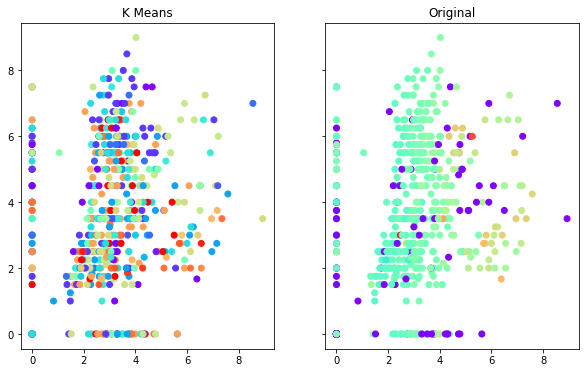

In [98]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data_test["Specific Gravity"], data_test["Mohs Hardness"],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data["Specific Gravity"], data["Mohs Hardness"],c=data["Refractive Index"],cmap='rainbow')

# Best K for KMeans
Here we use 2 methods to find the best k, one is elbow and the other is Silhouette Method. And the best part is we used both to get the best possible results.

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_without_name)

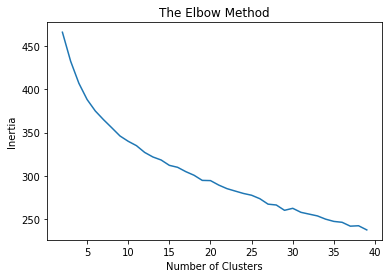

In [88]:
inertia = []
possible_K_values = [i for i in range(2,40)]

# we start with 2, as we can not have 0 clusters in k means, and 1 cluster is just a dataset
# iterate through each of our values

for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    model.fit(data_scaled)
    
    # append the inertia to our array
    inertia.append(model.inertia_)

plt.plot(possible_K_values, inertia)
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.show()

In [90]:
bad_k_values = {}
possible_K_values = [i for i in range(25,37)]

for each_value in possible_K_values:
  # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    model.fit(data_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(data_scaled, model.predict(data_scaled))

    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1

In [91]:
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')

 This Many Clusters: 25 | Number of Negative Values: 174
 This Many Clusters: 26 | Number of Negative Values: 159
 This Many Clusters: 27 | Number of Negative Values: 125
 This Many Clusters: 28 | Number of Negative Values: 105
 This Many Clusters: 29 | Number of Negative Values: 149
 This Many Clusters: 30 | Number of Negative Values: 185
 This Many Clusters: 31 | Number of Negative Values: 125
 This Many Clusters: 32 | Number of Negative Values: 158
 This Many Clusters: 33 | Number of Negative Values: 164
 This Many Clusters: 34 | Number of Negative Values: 151
 This Many Clusters: 35 | Number of Negative Values: 150
 This Many Clusters: 36 | Number of Negative Values: 183
